# Bounding Box and Calculation of IoU
There's a great [blog](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) explaining the details about bounding box and the intersection over union(IoU) metric.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

%matplotlib inline

In [2]:
def bbox_iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = (xB - xA + 1) * (yB - yA + 1)
    
    # in case there is no intersection area of these two boxes, just set it to 0
    interArea = max(0, interArea)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [3]:
Detection = namedtuple('Detection', ['gt', 'pred'])
examples = [
    Detection([35, 51, 196, 110], [15, 160, 180, 258]),
    Detection([39, 63, 203, 112], [94, 66, 198, 114]),
    Detection([49, 75, 203, 125], [42, 78, 186, 126]),
    Detection([31, 69, 201, 125], [18, 63, 235, 135]),
    Detection([50, 72, 197, 121], [54, 72, 198, 120]),
    Detection([35, 51, 196, 110], [35, 51, 196, 110])
]

In [4]:
def draw_bbox(ax, bbox, color='b'):
    xmin, ymin, xmax, ymax = bbox
    patch = plt.Rectangle((xmin, ymin), fill=False, linewidth=3, alpha=0.8,
                          edgecolor=color, height=ymax-ymin, width=xmax-xmin)
    ax.add_patch(patch)

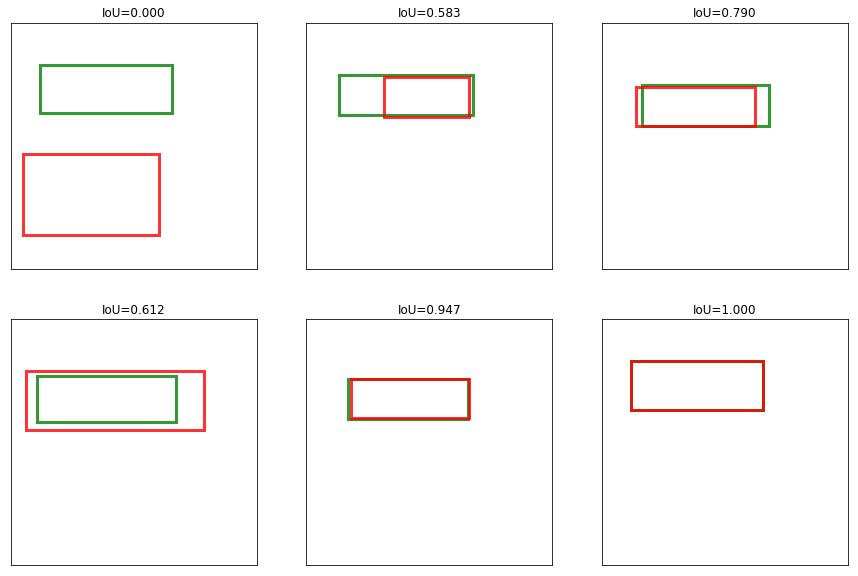

In [5]:
plt.figure(figsize=(15, 10))
for i, det in enumerate(examples):
    ax = plt.subplot(2, 3, i+1)
    ax.imshow(np.ones((300, 300, 3), dtype=np.uint8)*255)
    draw_bbox(ax, det.gt, 'g')
    draw_bbox(ax, det.pred, 'r')
    iou = bbox_iou(det.gt, det.pred)
    plt.title('IoU=%.3f' % iou)
    plt.xticks([])
    plt.yticks([])
plt.show()